# Respiratory sound recognition

In [8]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras import models

import librosa
import librosa.display

wave formed data and sampling rate saved via using librosa

In [9]:
# get root directory
root = os.path.expanduser('~')
DATASET_PATH = root + "/Library/CloudStorage/Box-Box/Capstone_Project/data/Sounds/"

test on one `wav` file one librosa

In [12]:
y, sr = librosa.load(DATASET_PATH+"156_5b3_Pl_mc_AKGC417L.wav", sr=4000)

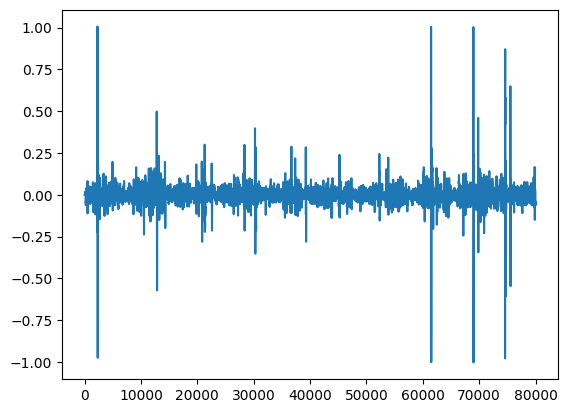

In [13]:
plt.plot(y)

In [14]:
print(f'waveform: {y}')
print(f'sampling rate: {sr}')

waveform: [ 0.          0.          0.         ... -0.0463681  -0.04264332
 -0.04512089]
sampling rate: 4000


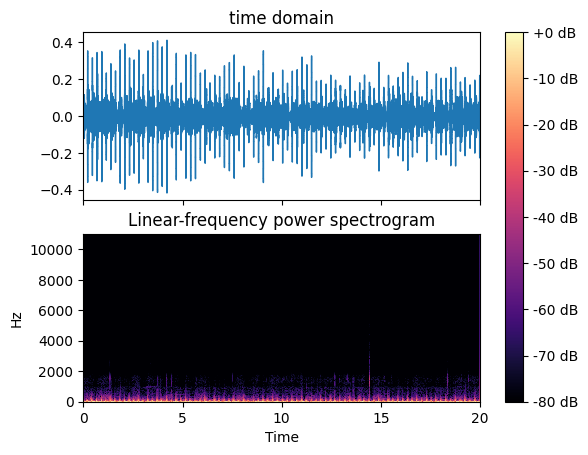

In [9]:
librosafig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

wav = librosa.display.waveshow(y, sr=sr, x_axis='time', ax=ax[0])
ax[0].set(title='time domain')
ax[0].label_outer()


D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',sr=sr, ax=ax[1])

ax[1].set(title='Linear-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

track the audio beat time

In [7]:
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 57.42 beats per minute


In [21]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times

array([ 1.39319728,  2.34521542,  3.27401361,  4.20281179,  5.2244898 ,
        6.2461678 ,  7.2678458 ,  8.28952381,  9.31120181, 10.33287982,
       11.35455782, 12.37623583, 13.39791383, 14.44281179])

## Try with numpy array and tf